In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from srim import TRIM, Ion, Layer, Target
from srim.output import Results

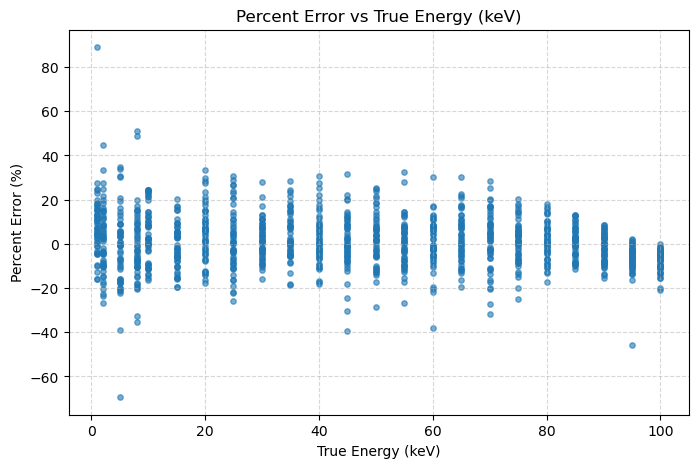

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/posterior_eval/posterior_summary.csv')

# If percent error isn't already a column, you can compute it like this:
# df['percent_error'] = 100 * (df['posterior_mean_keV'] - df['true_energy_keV']) / df['true_energy_keV']

# Scatter plot: Percent error as function of true energy
plt.figure(figsize=(8,5))
plt.scatter(df['true_energy_keV'], df['percent_error'], s=15, alpha=0.6)

plt.title('Percent Error vs True Energy (keV)')
plt.xlabel('True Energy (keV)')
plt.ylabel('Percent Error (%)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [28]:
output_directory = '/Users/cbharathulwar/Documents/Research/Walsworth/SRIM-2013'
os.makedirs(output_directory, exist_ok=True)
TRIM.copy_output_files('/Users/cbharathulwar/Documents/Research/Walsworth/SRIM-2013/SRIM Outputs/Run2', output_directory)

In [24]:
def plot_damage_energy(folder, ax):
    results = Results(folder)
    phon = results.phonons
    dx = max(phon.depth) / 100.0  # to units of Angstroms
    energy_damage = (phon.ions + phon.recoils) * dx
    ax.plot(phon.depth, energy_damage / phon.num_ions, label='{}'.format(folder))
    return sum(energy_damage)


def plot_ionization(folder, ax):
    results = Results(folder)
    ioniz = results.ioniz
    dx = max(ioniz.depth) / 100.0  # to units of Angstroms
    ax.plot(ioniz.depth, ioniz.ions, label='Ionization from Ions')
    ax.plot(ioniz.depth, ioniz.recoils, label='Ionization from Recoils')


def plot_vacancies(folder, ax):
    results = Results(folder)
    vac = results.vacancy
    vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)
    ax.plot(vac.depth, vacancy_depth, label="Total vacancies at depth")
    return sum(vacancy_depth)


folders = ['test_files/2', 'test_files/4']
image_directory = 'examples/images'
os.makedirs(image_directory, exist_ok=True)

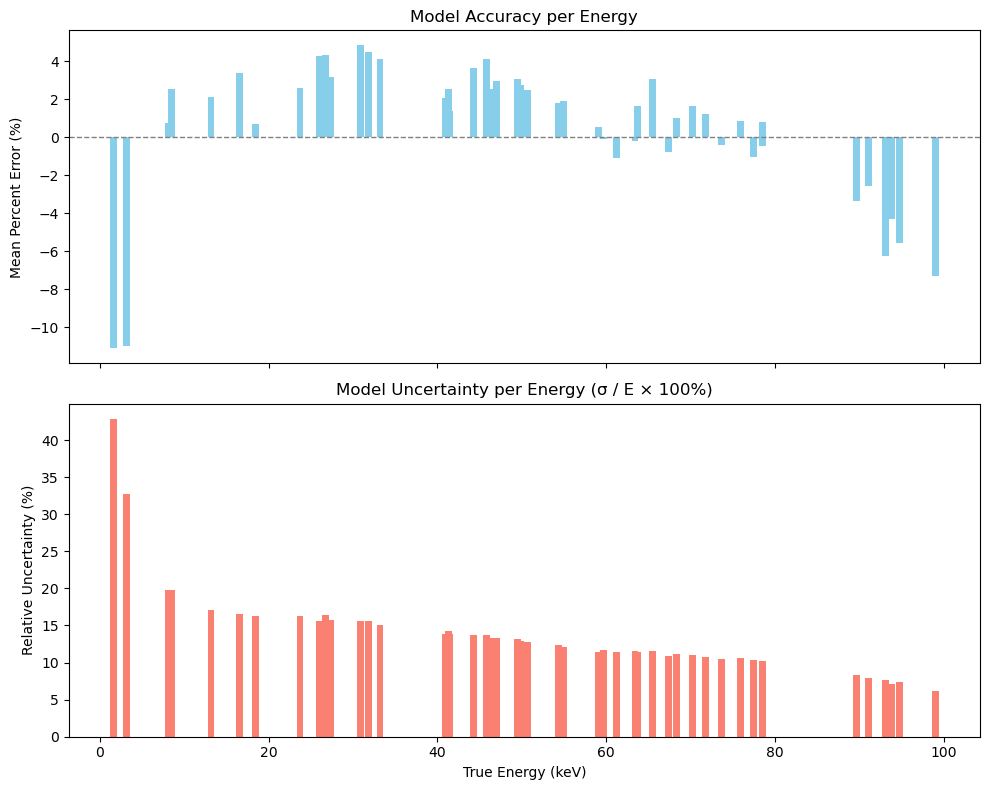

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/random_energy_eval.csv') 

# Add relative uncertainty (σ/E) without modifying the CSV
df['relative_uncertainty'] = (df['posterior_std_keV'] / df['true_energy_keV']) * 100  # in %

# Group by true energy and compute mean percent error + mean relative uncertainty
grouped = df.groupby('true_energy_keV').agg({
    'percent_error': 'mean',
    'relative_uncertainty': 'mean'
}).reset_index()

# Set up figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Top: Accuracy (Mean Percent Error) ---
axes[0].bar(grouped['true_energy_keV'], grouped['percent_error'], color='skyblue')
axes[0].axhline(0, linestyle='--', color='gray', linewidth=1)
axes[0].set_title('Model Accuracy per Energy')
axes[0].set_ylabel('Mean Percent Error (%)')

# --- Bottom: Uncertainty (Relative Posterior Std = σ/E) ---
axes[1].bar(grouped['true_energy_keV'], grouped['relative_uncertainty'], color='salmon')
axes[1].set_title('Model Uncertainty per Energy (σ / E × 100%)')
axes[1].set_xlabel('True Energy (keV)')
axes[1].set_ylabel('Relative Uncertainty (%)')

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Ensure pandas prints all rows (no truncation)
pd.set_option('display.max_rows', None)

# Group by energy and compute stats
grouped = df.groupby("true_energy_keV").agg(
    mean_error = ("percent_error", "mean"),
    std_error = ("percent_error", "std"),
    mean_uncertainty = ("posterior_std_keV", "mean")
).reset_index()

# Show all 50 energy rows
print(grouped)




    true_energy_keV  mean_error  std_error  mean_uncertainty
0          1.633153  -11.100772  12.463253          0.698581
1          3.153608  -11.004330  21.784243          1.030147
2          8.117187    0.771685  12.454044          1.608367
3          8.549817    2.558203  14.232175          1.691573
4         13.196482    2.126018  11.482165          2.253624
5         16.528032    3.405396  13.803600          2.736821
6         18.496384    0.678297  13.237669          3.011163
7         23.734308    2.567965  14.047804          3.874338
8         26.079676    4.272104  12.960430          4.054995
9         26.763968    4.313329  11.524247          4.405739
10        27.385673    3.167301  12.240079          4.328462
11        30.884666    4.827953  12.962414          4.824539
12        31.878290    4.498673  11.407198          4.976855
13        33.214899    4.111710  11.748645          4.999148
14        40.953571    2.056066  13.677393          5.666060
15        41.311172    2

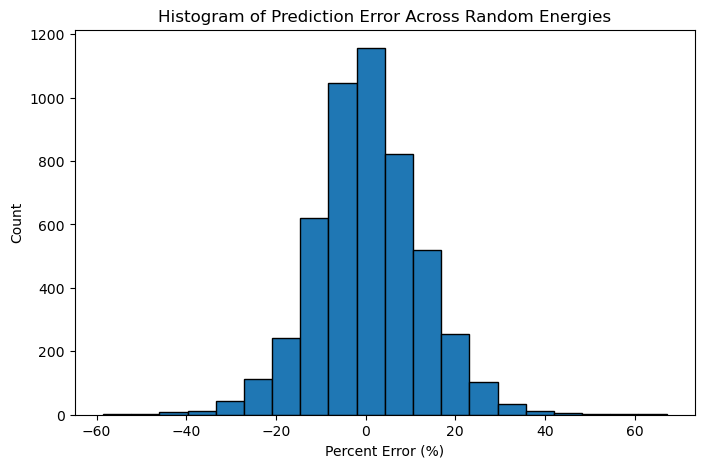

Mean Error (%): 0.5430267924248259
Std Dev (%): 11.902845250602374


In [22]:
import matplotlib.pyplot as plt

errors = df["percent_error"]

plt.figure(figsize=(8,5))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Percent Error (%)")
plt.ylabel("Count")
plt.title("Histogram of Prediction Error Across Random Energies")
plt.show()

print("Mean Error (%):", errors.mean())
print("Std Dev (%):", errors.std())

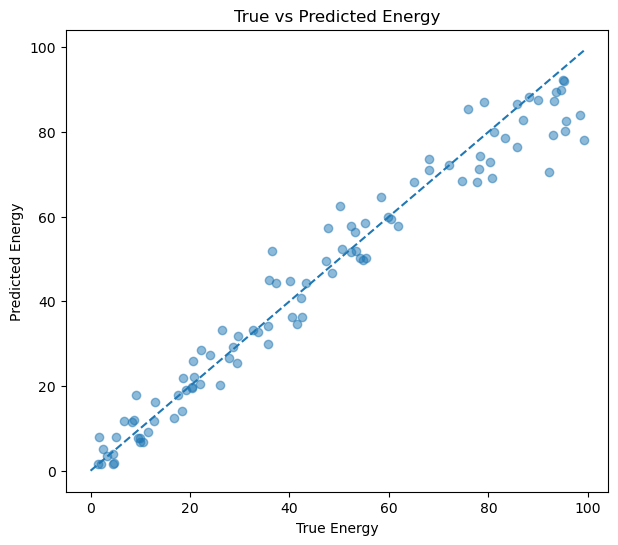

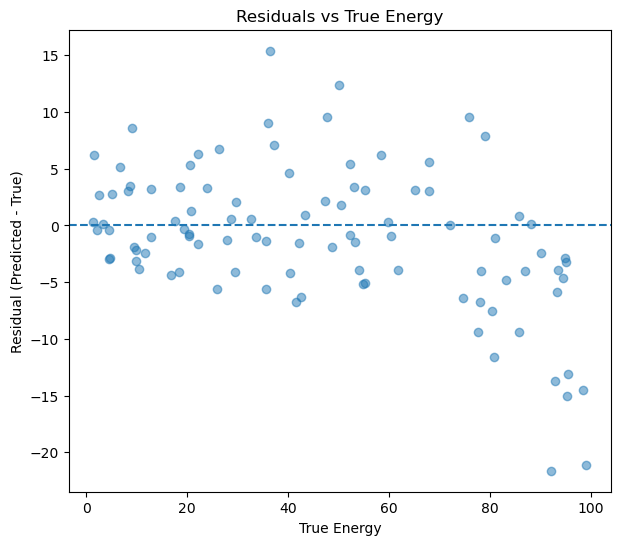

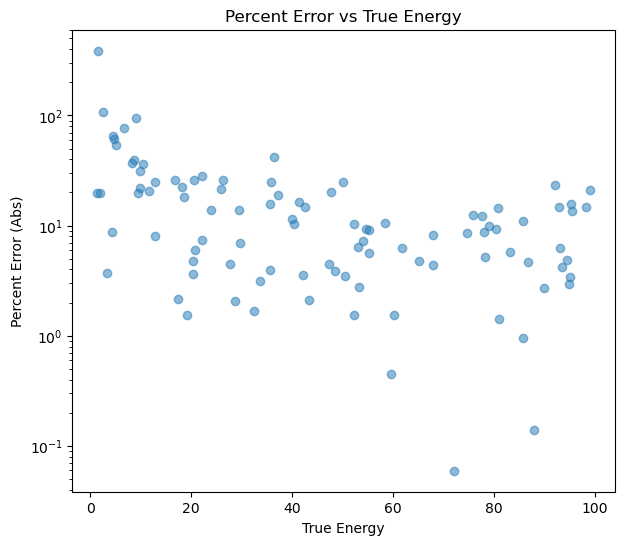

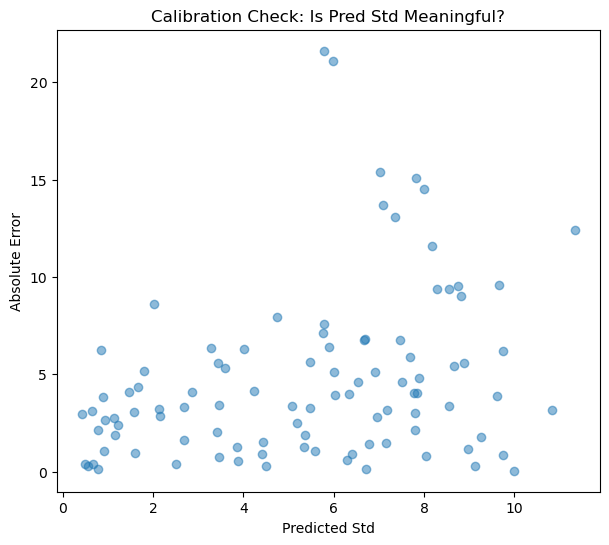

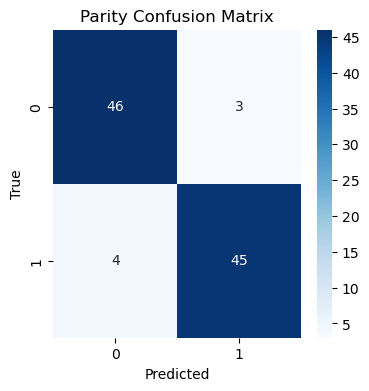


--- METRICS ---
MAE: 4.675754664217202
RMSE: 6.356362914654654
Mean Percent Error: 19.59608533603036
Parity Accuracy: 0.9285714285714286


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# LOAD & CLEAN
# -----------------------------------
df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/random_eval_results_mnpe.csv")

# Keep only rows with predictions
df_pred = df[df["status"] == "OK"].copy()

# Basic computed columns
df_pred["residual"] = df_pred["pred_energy_mean"] - df_pred["true_energy"]
df_pred["abs_error"] = df_pred["residual"].abs()

# -----------------------------------
# PLOT 1 — True Energy vs Predicted Energy
# -----------------------------------
plt.figure(figsize=(7,6))
plt.scatter(df_pred["true_energy"], df_pred["pred_energy_mean"], alpha=0.5)
plt.plot([0, df_pred["true_energy"].max()],
         [0, df_pred["true_energy"].max()],
         linestyle="--")
plt.xlabel("True Energy")
plt.ylabel("Predicted Energy")
plt.title("True vs Predicted Energy")
plt.show()

# -----------------------------------
# PLOT 2 — Residuals vs True Energy
# -----------------------------------
plt.figure(figsize=(7,6))
plt.scatter(df_pred["true_energy"], df_pred["residual"], alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("True Energy")
plt.ylabel("Residual (Predicted - True)")
plt.title("Residuals vs True Energy")
plt.show()

# -----------------------------------
# PLOT 3 — Percent Error vs True Energy
# -----------------------------------
plt.figure(figsize=(7,6))
plt.scatter(df_pred["true_energy"], df_pred["percent_error_abs"], alpha=0.5)
plt.yscale("log")   # huge outliers → log scale helps
plt.xlabel("True Energy")
plt.ylabel("Percent Error (Abs)")
plt.title("Percent Error vs True Energy")
plt.show()

# -----------------------------------
# PLOT 4 — Prediction Std vs Absolute Error
# -----------------------------------
plt.figure(figsize=(7,6))
plt.scatter(df_pred["pred_energy_std"], df_pred["abs_error"], alpha=0.5)
plt.xlabel("Predicted Std")
plt.ylabel("Absolute Error")
plt.title("Calibration Check: Is Pred Std Meaningful?")
plt.show()

# -----------------------------------
# PLOT 5 — Parity Confusion Matrix
# -----------------------------------
from sklearn.metrics import confusion_matrix
import seaborn as sns  # only for heatmap, can remove if needed

cm = confusion_matrix(df_pred["true_parity"], df_pred["pred_parity"])

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Parity Confusion Matrix")
plt.show()

# -----------------------------------
# PRINT SUMMARY METRICS
# -----------------------------------
print("\n--- METRICS ---")
print("MAE:", df_pred["abs_error"].mean())
print("RMSE:", np.sqrt((df_pred["abs_error"]**2).mean()))
print("Mean Percent Error:", df_pred["percent_error_abs"].mean())
print("Parity Accuracy:", (df_pred["parity_correct"] == 1).mean())

In [62]:
import numpy as np

df_ok = df[df["status"] == "OK"].copy()
df_ok["percent_error_abs"] = 100 * np.abs(df_ok["pred_energy_mean"] - df_ok["true_energy"]) / df_ok["true_energy"]

def summarize_range(e_min, e_max):
    mask = (df_ok["true_energy"] >= e_min) & (df_ok["true_energy"] <= e_max)
    sub = df_ok[mask]
    mae  = np.abs(sub["pred_energy_mean"] - sub["true_energy"]).mean()
    rmse = np.sqrt(((sub["pred_energy_mean"] - sub["true_energy"])**2).mean())
    mpe  = sub["percent_error_abs"].mean()
    print(f"E in [{e_min}, {e_max}] keV  (N={len(sub)})")
    print(f"  MAE:  {mae:.3f} keV")
    print(f"  RMSE: {rmse:.3f} keV")
    print(f"  Mean % error: {mpe:.2f}%")
    print()

# Whole range
summarize_range(1, 100)

# Ignore the pathological low-energy region
summarize_range(5, 100)
summarize_range(10, 100)

E in [1, 100] keV  (N=98)
  MAE:  4.676 keV
  RMSE: 6.356 keV
  Mean % error: 19.60%

E in [5, 100] keV  (N=90)
  MAE:  4.915 keV
  RMSE: 6.580 keV
  Mean % error: 13.86%

E in [10, 100] keV  (N=82)
  MAE:  5.025 keV
  RMSE: 6.761 keV
  Mean % error: 10.64%



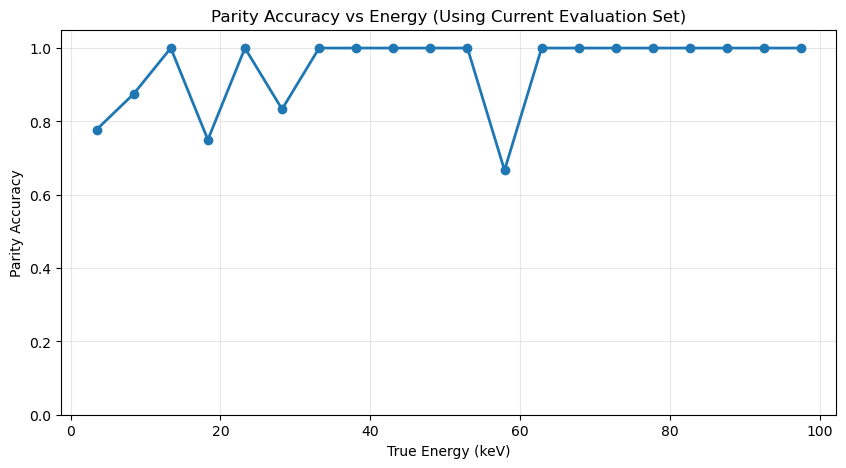

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your existing evaluation file
df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/random_eval_results_mnpe2.csv")

# Remove skipped rows
df = df[df["status"] == "OK"]

# Compute correctness
df["correct"] = (df["true_parity"] == df["pred_parity"]).astype(int)

# ----- BIN energies -----
bins = np.linspace(1, 100, 21)   # 20 bins from 1–100 keV
df["bin"] = np.digitize(df["true_energy"], bins)

# Accuracy per bin
acc = df.groupby("bin")["correct"].mean()

# Bin centers
centers = (bins[:-1] + bins[1:]) / 2

# Plot
plt.figure(figsize=(10,5))
plt.plot(centers, acc.values, "-o", linewidth=2)
plt.xlabel("True Energy (keV)")
plt.ylabel("Parity Accuracy")
plt.title("Parity Accuracy vs Energy (Using Current Evaluation Set)")
plt.ylim(0, 1.05)
plt.grid(alpha=0.3)
plt.show()

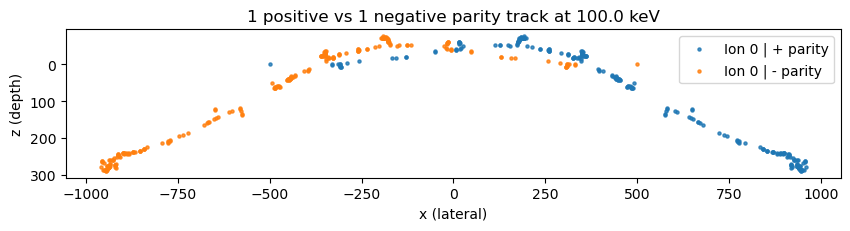

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_one_pos_vs_one_neg(file_path, energy_value, index_pos=0, index_neg=0, tol=1e-6):
    df = pd.read_csv(file_path)

    # Step 1: Get only rows with this energy (float-safe)
    df_e = df[abs(df['energy'] - energy_value) < tol]
    if df_e.empty:
        print(f"No data for energy = {energy_value}")
        return

    # Step 2: Get all ion_numbers that exist for +1 parity and -1 parity separately at this energy
    pos_ions = df_e[df_e['parity'] == 1]['ion_number'].unique()
    neg_ions = df_e[df_e['parity'] == -1]['ion_number'].unique()

    if len(pos_ions) == 0 or len(neg_ions) == 0:
        print(f"No + and - parity tracks found at {energy_value} keV")
        return

    # Step 3: Select ion_number index_pos from +1 list and index_neg from -1 list
    ion_pos = pos_ions[index_pos]
    ion_neg = neg_ions[index_neg]

    # Step 4: Filter data properly for those two tracks only
    track_pos = df[(df['ion_number'] == ion_pos) &
                   (abs(df['energy'] - energy_value) < tol) &
                   (df['parity'] == 1)]

    track_neg = df[(df['ion_number'] == ion_neg) &
                   (abs(df['energy'] - energy_value) < tol) &
                   (df['parity'] == -1)]

    # Step 5: Plot
    plt.figure(figsize=(10, 4))
    plt.scatter(track_pos['x'], track_pos['z'], s=5, alpha=0.8,
                label=f"Ion {ion_pos} | + parity")
    plt.scatter(track_neg['x'], track_neg['z'], s=5, alpha=0.8,
                label=f"Ion {ion_neg} | - parity")

    plt.title(f"1 positive vs 1 negative parity track at {energy_value} keV")
    plt.xlabel("x (lateral)")
    plt.ylabel("z (depth)")
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Example usage:
file_path = "/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim/vacancies_with_parity_centered.csv"
plot_one_pos_vs_one_neg(file_path, energy_value =100.0, index_pos=0, index_neg=0)

In [51]:
import pandas as pd
import numpy as np
import os

# === File paths ===
base_path = "/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim"
input_file = os.path.join(base_path, "vacancies.csv")
output_file = os.path.join(base_path, "vacancies_with_parity_centered.csv")

# === Load raw SRIM data ===
# Expected columns: x, y, z, ion_number, energy
df = pd.read_csv(input_file)

# Safety check
required_cols = {"x", "y", "z", "ion_number", "energy"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"CSV must contain columns {required_cols}, found {df.columns}")

all_tracks = []

# === Process each track ===
for ion_id, track in df.groupby("ion_number"):
    
    # Center x around mean (doesn’t change physics, just reference frame)
    track_centered = track.copy()
    track_centered["x"] = track["x"] - track["x"].mean()
    track_centered["parity"] = 1   # +1 for original
    
    # Create mirrored version: x → -x
    track_flipped = track_centered.copy()
    track_flipped["x"] = -track_centered["x"]
    track_flipped["parity"] = -1   # -1 for flipped
    
    # Store both
    all_tracks.append(track_centered)
    all_tracks.append(track_flipped)

# === Combine all tracks ===
final_df = pd.concat(all_tracks, ignore_index=True)

# === Save to new CSV ===
final_df.to_csv(output_file, index=False)

print(f"✅ Done. Saved centered + parity-augmented data to:\n{output_file}")
print(final_df.head())

✅ Done. Saved centered + parity-augmented data to:
/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim/vacancies_with_parity_centered.csv
           x        y       z  ion_number  energy  parity
0 -610.87856  0.00000  0.0000           0     1.0       1
1 -609.75556  0.09135  1.3840           0     1.0       1
2 -606.26456 -0.15200  1.9560           0     1.0       1
3 -609.23656  0.52130 -0.4653           0     1.0       1
4 -608.49456  1.98100  0.2443           0     1.0       1


In [70]:
import pandas as pd

df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim/vacancies_with_parity_centered.csv")

print(df['parity'].unique())
print(df.groupby('parity').size())
print(df.head())
df['energy'].value_counts().sort_index().head(10)

[ 1 -1]
parity
-1    897447
 1    897447
dtype: int64
           x        y       z  ion_number  energy  parity
0 -610.87856  0.00000  0.0000           0     1.0       1
1 -609.75556  0.09135  1.3840           0     1.0       1
2 -606.26456 -0.15200  1.9560           0     1.0       1
3 -609.23656  0.52130 -0.4653           0     1.0       1
4 -608.49456  1.98100  0.2443           0     1.0       1


energy
1.0      5812
2.5     12626
5.0     22802
7.5     30138
10.0    36884
15.0    47648
20.0    56260
25.0    65586
30.0    70952
35.0    77966
Name: count, dtype: int64

In [71]:
import pandas as pd

e = 75.0  # pick one
sub = df[df.energy.round(6)==round(e,6)]
counts = sub.groupby('ion_number').size().describe()
print(counts)  # look at min/median/max points per ion

count    200.000000
mean     545.820000
std      116.669044
min      294.000000
25%      459.500000
50%      532.000000
75%      606.500000
max      928.000000
dtype: float64


In [64]:
from pathlib import Path

RAW_CSV = Path("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim/centered_tracks.csv")

# src/utils/data_utils.py

import numpy as np
import pandas as pd
from pathlib import Path
import torch
from sklearn.neighbors import NearestNeighbors


def infer_relative_bin_edges(n_bins=6, r_min=1e-3, r_max=1.0):
    edges = np.geomspace(r_min, r_max, n_bins)
    edges = np.insert(edges, 0, 0.0)
    return edges


def relative_bin_fractions_from_events(depths_A, norm_depth_A, r_edges):
    x = np.asarray(depths_A, float)
    x = x[np.isfinite(x)]
    if x.size == 0 or norm_depth_A <= 0:
        return np.zeros(len(r_edges) - 1, float)

    r = x / (norm_depth_A + 1e-12)
    hist, _ = np.histogram(r, bins=r_edges)
    hist[-1] += np.sum(r > r_edges[-1])

    total = hist.sum()
    if total == 0:
        return np.zeros_like(hist, dtype=float)

    return hist / total


def compute_centered_track_asymmetry(x, eps=1e-12):
    x = np.asarray(x, dtype=float)
    if x.size == 0:
        return 0.0
    
    # Consistent definition with NN asymmetry:
    n_left = np.sum(x < 0)
    n_right = np.sum(x > 0)

    total = n_left + n_right
    if total == 0:
        return 0.0

    return (n_right - n_left) / (total + eps)


def compute_centered_nn_asymmetry(x, z, eps=1e-12):
    """
    Compute NN asymmetry using only TWO bins:
      - left side (x < 0)
      - right side (x > 0)
    Much more stable than the previous multi-bin version.
    """

    x = np.asarray(x, float)
    z = np.asarray(z, float)
    if x.size < 2:
        return 0.0

    # Two regions after centering
    left_mask = x < 0
    right_mask = x > 0

    left_pts = np.column_stack((x[left_mask], z[left_mask]))
    right_pts = np.column_stack((x[right_mask], z[right_mask]))

    # Helper: mean nearest-neighbor distance
    def mean_nn(points):
        if points.shape[0] < 2:
            return np.nan
        nn = NearestNeighbors(n_neighbors=2).fit(points)
        dists, _ = nn.kneighbors(points)
        return float(np.mean(dists[:, 1]))

    d_left = mean_nn(left_pts)
    d_right = mean_nn(right_pts)

    # Handle edge cases where one side has <2 points
    if np.isnan(d_left) or np.isnan(d_right):
        return 0.0

    return (d_right - d_left) / (d_right + d_left + eps)

def preprocess2(data_path: str | Path, n_bins: int = 6):
    import numpy as np
    import pandas as pd
    import torch
    from pathlib import Path
    from scipy.stats import skew
    from sklearn.neighbors import NearestNeighbors

    df = pd.read_csv(data_path)

    # -----------------------------
    # STANDARDIZE COLUMN NAMES
    # -----------------------------
    rename_map = {"x_ang": "x", "y_ang": "y", "z_ang": "z"}
    df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

    required_cols = ["x", "y", "z", "ion_number", "parity"]
    for c in required_cols:
        if c not in df.columns:
            raise KeyError(f"Missing column '{c}' in {data_path}")

    # -----------------------------
    # ENERGY HANDLING
    # -----------------------------
    if "energy_keV" in df.columns:
        df["energy_keV"] = pd.to_numeric(df["energy_keV"], errors="coerce")
    elif "energy_eV" in df.columns:
        df["energy_keV"] = pd.to_numeric(df["energy_eV"], errors="coerce") / 1e3
    elif "energy" in df.columns:
        e_raw = pd.to_numeric(df["energy"], errors="coerce")
        df["energy_keV"] = e_raw / 1e3 if e_raw.max() > 3000 else e_raw
    else:
        raise KeyError("No energy column found.")

    # Ensure numeric
    for col in ["x", "y", "z", "ion_number", "energy_keV", "parity"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Drop bad rows
    df = df.dropna(subset=["x", "y", "z", "ion_number", "energy_keV", "parity"]).reset_index(drop=True)

    # Raw continuous energy
    df["energy_norm"] = df["energy_keV"]

    # -----------------------------
    # RELATIVE BIN EDGES
    # -----------------------------
    def infer_relative_bin_edges(n_bins=6, r_min=1e-3, r_max=1.0):
        edges = np.geomspace(r_min, r_max, n_bins)
        edges = np.insert(edges, 0, 0.0)
        return edges

    r_edges = infer_relative_bin_edges(n_bins)

    # -----------------------------
    # HELPERS (copied + stable)
    # -----------------------------
    def relative_bin_fractions_from_events(depths_A, norm_depth_A, r_edges):
        x = np.asarray(depths_A, float)
        x = x[np.isfinite(x)]
        if x.size == 0 or norm_depth_A <= 0:
            return np.zeros(len(r_edges) - 1, float)

        r = x / (norm_depth_A + 1e-12)
        hist, _ = np.histogram(r, bins=r_edges)
        hist[-1] += np.sum(r > r_edges[-1])

        total = hist.sum()
        if total == 0:
            return np.zeros_like(hist, dtype=float)

        return hist / total

    def compute_centered_track_asymmetry(x, eps=1e-12):
        x = np.asarray(x, dtype=float)
        if x.size == 0:
            return 0.0
        n_left = np.sum(x < 0)
        n_right = np.sum(x > 0)
        total = n_left + n_right
        if total == 0:
            return 0.0
        return (n_right - n_left) / (total + eps)

    def compute_centered_nn_asymmetry(x, z, eps=1e-12):
        x = np.asarray(x, float)
        z = np.asarray(z, float)
        if x.size < 2:
            return 0.0

        left_mask = x < 0
        right_mask = x > 0

        left_pts = np.column_stack((x[left_mask], z[left_mask]))
        right_pts = np.column_stack((x[right_mask], z[right_mask]))

        def mean_nn(points):
            if points.shape[0] < 2:
                return np.nan
            nn = NearestNeighbors(n_neighbors=2).fit(points)
            dists, _ = nn.kneighbors(points)
            return float(np.mean(dists[:, 1]))

        d_left = mean_nn(left_pts)
        d_right = mean_nn(right_pts)

        if np.isnan(d_left) or np.isnan(d_right):
            return 0.0

        return (d_right - d_left) / (d_right + d_left + eps)

    # -----------------------------
    # MAIN LOOP
    # -----------------------------
    rows = []
    x_obs_list = []
    theta_list = []
    track_ids = []

    for (E_val, ion_no, par), g in df.groupby(["energy_norm", "ion_number", "parity"], sort=False):

        x = np.asarray(g["x"], float)
        z = np.asarray(g["z"], float)
        if x.size == 0:
            continue

        # ===== ORIGINAL FEATURES =====
        mean_depth = float(np.mean(np.abs(x)))
        max_depth = float(np.max(np.abs(x)))
        norm_depth = float(np.percentile(np.abs(x), 95))
        n_vac = int(len(x))

        rbin_fracs = relative_bin_fractions_from_events(np.abs(x), norm_depth, r_edges)
        asym_count = compute_centered_track_asymmetry(x)
        asym_nn = compute_centered_nn_asymmetry(x, z)

        # -----------------------------
        # NEW PARITY FEATURES
        # -----------------------------
        # 1) Skewness (safe)
        try:
            skew_x = float(skew(x)) if x.size > 2 else 0.0
        except Exception:
            skew_x = 0.0
        if not np.isfinite(skew_x):
            skew_x = 0.0

        # 2) Left / right splits
        left_x = x[x < 0]
        right_x = x[x > 0]

        var_left = np.var(left_x) if left_x.size > 2 else 0.0
        var_right = np.var(right_x) if right_x.size > 2 else 0.0
        var_diff_x = float(var_right - var_left)
        if not np.isfinite(var_diff_x):
            var_diff_x = 0.0

        abs_left = np.abs(left_x)
        abs_right = np.abs(right_x)

        mean_abs_left = abs_left.mean() if abs_left.size > 0 else 1e-9
        mean_abs_right = abs_right.mean() if abs_right.size > 0 else 1e-9

        mean_abs_ratio_lr = float(mean_abs_right / (mean_abs_left + 1e-9))
        if not np.isfinite(mean_abs_ratio_lr):
            mean_abs_ratio_lr = 1.0

        # -----------------------------
        # TRACK ID
        # -----------------------------
        tid = f"E{E_val:.3f}_ion{int(ion_no)}_p{int(par)}"

        # -----------------------------
        # STORE CSV SUMMARY ROW
        # -----------------------------
        rows.append({
            "track_id": tid,
            "energy_keV": float(E_val),
            "parity": int(par),
            "mean_depth_A": mean_depth,
            "max_depth_A": max_depth,
            "vacancies_per_ion": n_vac,
            **{f"rbin_frac_{i+1}": rbin_fracs[i] for i in range(n_bins)},
            "asym_count_centered": asym_count,
            "asym_nn_centered": asym_nn,
            "skew_x": skew_x,
            "var_diff_x": var_diff_x,
            "mean_abs_ratio_lr": mean_abs_ratio_lr,
        })

        # -----------------------------
        # FEATURE VECTOR APPEND
        # -----------------------------
        x_obs_list.append([
            mean_depth, max_depth, n_vac,
            *rbin_fracs,
            asym_count, asym_nn,
            skew_x, var_diff_x, mean_abs_ratio_lr,
        ])

        theta_list.append([float(E_val), float(int(par))])
        track_ids.append(tid)

    # -----------------------------
    # FINAL TENSORS
    # -----------------------------
    if len(x_obs_list) == 0:
        print("[WARN] preprocess2 found NO valid tracks.")
        return (
            torch.zeros((0, 14)),
            torch.zeros((0, 2)),
            [],
            {"rel_bin_edges": r_edges},
            pd.DataFrame(rows),
        )

    x_obs = torch.tensor(np.array(x_obs_list, dtype=np.float32))
    theta = torch.tensor(np.array(theta_list, dtype=np.float32))
    theta[:, 1] = (theta[:, 1] == 1).float()

    df_summary = pd.DataFrame(rows)

    print(f"[DEBUG] Tracks: {len(track_ids)}")
    print(f"[DEBUG] x_obs shape: {x_obs.shape}")
    print(f"[DEBUG] theta shape: {theta.shape}")

    return x_obs, theta, track_ids, {"rel_bin_edges": r_edges}, df_summary

In [65]:
x_obs, theta, track_ids, meta, df_summary = preprocess2(RAW_CSV, n_bins=6)

[DEBUG] Tracks: 4600
[DEBUG] x_obs shape: torch.Size([4600, 14])
[DEBUG] theta shape: torch.Size([4600, 2])


In [67]:
low = df_summary[df_summary.energy_keV < 5]


low.describe()


,energy_keV,parity,mean_depth_A,max_depth_A,vacancies_per_ion,rbin_frac_1,rbin_frac_2,rbin_frac_3,rbin_frac_4,rbin_frac_5,rbin_frac_6,asym_count_centered,asym_nn_centered,skew_x,var_diff_x,mean_abs_ratio_lr
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.750000,0.500000,8.989633,20.863491,23.047500,0.001811,0.001927,0.012490,0.050462,0.201808,0.731503,-0.003464,0.002845,0.003443,6.106814,1.135211
std,0.750939,0.500626,5.705647,12.759934,10.050012,0.011204,0.009128,0.025917,0.061227,0.126732,0.153804,0.230417,0.302653,0.700912,74.136523,0.595108
min,1.000000,0.000000,0.756903,2.517783,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,-0.666667,-0.812159,-2.576089,-298.682654,0.272727
25%,1.000000,0.000000,4.923334,10.765000,14.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.620690,-0.144377,-0.216366,-0.429083,-9.291616,0.714286
50%,1.750000,0.500000,7.652133,17.419654,21.500000,0.000000,0.000000,0.000000,0.031754,0.187500,0.750000,0.000000,0.001374,-0.005406,0.403832,1.000000
75%,2.500000,1.000000,11.265856,26.780242,31.000000,0.000000,0.000000,0.000000,0.083333,0.285714,0.844872,0.166667,0.213984,0.438080,13.532937,1.337500
max,2.500000,1.000000,34.209778,71.032667,49.000000,0.125000,0.083333,0.130435,0.300000,0.666667,1.000000,0.571429,0.835292,2.289808,625.314091,5.000000


In [68]:
high = df_summary[df_summary.energy_keV > 20]
high.describe()

,energy_keV,parity,mean_depth_A,max_depth_A,vacancies_per_ion,rbin_frac_1,rbin_frac_2,rbin_frac_3,rbin_frac_4,rbin_frac_5,rbin_frac_6,asym_count_centered,asym_nn_centered,skew_x,var_diff_x,mean_abs_ratio_lr
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,62.500000,0.500000,199.641407,591.894322,247.300625,0.001113,0.003356,0.013361,0.052265,0.229122,0.700783,0.003108,0.000213,0.002583,238.623239,1.148449
std,23.052463,0.500078,90.017988,240.030857,69.298361,0.003279,0.006868,0.020873,0.052854,0.143158,0.168495,0.254827,0.281455,1.041945,35216.362642,0.650927
min,25.000000,0.000000,12.035524,33.779113,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087558,-0.714286,-0.787818,-3.551752,-157918.434967,0.179825
25%,43.750000,0.000000,129.661553,397.879455,198.000000,0.000000,0.000000,0.000000,0.014179,0.121239,0.601231,-0.192661,-0.216344,-0.793250,-17091.808930,0.670696
50%,62.500000,0.500000,192.531199,581.150237,240.000000,0.000000,0.000000,0.005089,0.034889,0.203932,0.726272,0.000000,-0.001521,-0.020357,-136.290638,1.000000
75%,81.250000,1.000000,259.920897,771.682019,287.000000,0.000000,0.004292,0.018234,0.073801,0.309340,0.826690,0.197106,0.215419,0.807536,16341.571950,1.477273
max,100.000000,1.000000,550.347410,1330.773371,674.000000,0.052863,0.061321,0.246875,0.375000,0.879630,0.994220,0.695167,0.757187,3.780587,170581.968231,6.000000


In [69]:
low[[f"rbin_frac_{i}" for i in range(1,7)]].mean()

rbin_frac_1    0.001811
rbin_frac_2    0.001927
rbin_frac_3    0.012490
rbin_frac_4    0.050462
rbin_frac_5    0.201808
rbin_frac_6    0.731503
dtype: float64

<Axes: >

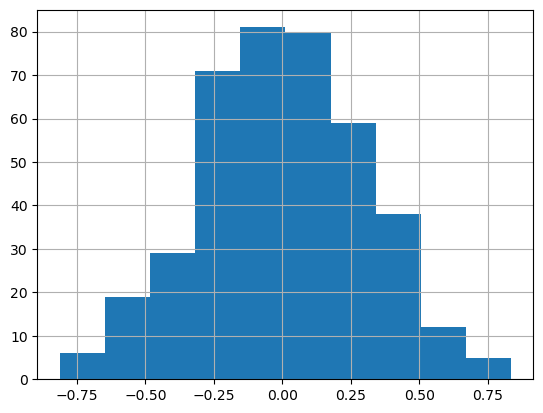

In [70]:
low["asym_nn_centered"].hist()

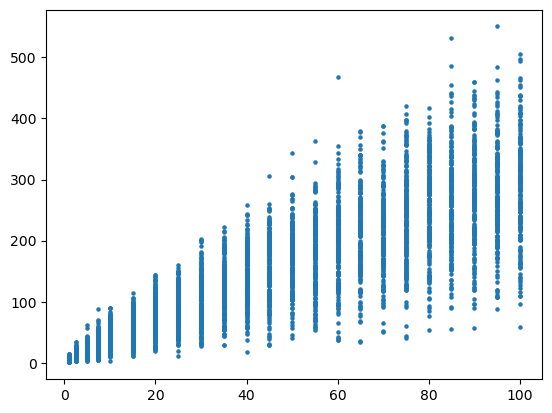

In [71]:
import matplotlib.pyplot as plt
plt.scatter(df_summary.energy_keV, df_summary.mean_depth_A, s=5)

In [55]:
import pandas as pd
import numpy as np

# Load your SRIM data
df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/nov3srim/vacancies.csv")  
# MUST contain: x, y, z, ion_number, energy

processed_rows = []

# Group by energy first
for energy, g_energy in df.groupby("energy"):
    
    # Get all track IDs for this energy
    track_ids = g_energy["ion_number"].unique()
    track_ids = np.sort(track_ids)       # keep deterministic
    
    # Force 50/50 split
    n = len(track_ids)
    half = n // 2
    
    # parity assignment:
    # parity = 0 → RIGHT→LEFT → FLIP
    # parity = 1 → LEFT→RIGHT → DON'T FLIP
    parity_map = {}
    
    # First half → parity 0 (flip)
    for tid in track_ids[:half]:
        parity_map[tid] = 0
        
    # Second half → parity 1 (no flip)
    for tid in track_ids[half:]:
        parity_map[tid] = 1

    # Now process each track inside this energy
    for tid, g_track in g_energy.groupby("ion_number"):
        
        coords = g_track[["x", "y", "z"]].to_numpy()
        parity = parity_map[tid]

        # --- APPLY FLIP BASED ON PARITY ---
        if parity == 0:        # 0 = right→left = flip
            coords[:, 0] *= -1
        
        # --- CENTER THE TRACK ---
        centroid = coords.mean(axis=0)
        coords_centered = coords - centroid
        
        # --- SAVE RESULTS ---
        for (idx, (xc, yc, zc)) in zip(g_track.index, coords_centered):
            processed_rows.append({
                "x": xc,                 # keep SAME column names
                "y": yc,
                "z": zc,
                "ion_number": tid,
                "energy": energy,
                "parity": parity         # add label
            })

processed_df = pd.DataFrame(processed_rows)

In [5]:
parity_check = (
    processed_df
      .drop_duplicates(["energy", "ion_number"])  # one row per track
      .groupby("energy")["parity"]
      .value_counts()
)

print(parity_check)

energy  parity
1.0     0         100
        1         100
2.5     0         100
        1         100
5.0     0         100
        1         100
7.5     0         100
        1         100
10.0    0         100
        1         100
15.0    0         100
        1         100
20.0    0         100
        1         100
25.0    0         100
        1         100
30.0    0         100
        1         100
35.0    0         100
        1         100
40.0    0         100
        1         100
45.0    0         100
        1         100
50.0    0         100
        1         100
55.0    0         100
        1         100
60.0    0         100
        1         100
65.0    0         100
        1         100
70.0    0         100
        1         100
75.0    0         100
        1         100
80.0    0         100
        1         100
85.0    0         100
        1         100
90.0    0         100
        1         100
95.0    0         100
        1         100
100.0   0        

In [56]:
def get_track(df, energy, ion_number):
    """Return a DataFrame containing a single centered track."""
    return df[(df.energy == energy) & (df.ion_number == ion_number)]


import matplotlib.pyplot as plt

def plot_track_2d(df, energy, ion_number, ax=None):
    track = get_track(df, energy, ion_number)
    if len(track) == 0:
        raise ValueError("No track found for that energy & ion number.")

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))

    x = track.x.values
    z = track.z.values
    parity = int(track.parity.iloc[0])

    color = "red" if parity == 0 else "blue"
    label = f"Track {ion_number} (parity {parity})"

    ax.plot(x, z, "o-", markersize=4, color=color, label=label)
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"Energy {energy} keV — 2D Track {ion_number}")
    ax.axvline(0, color='k', linewidth=1)
    ax.axhline(0, color='k', linewidth=1)
    ax.legend()

    return ax



from mpl_toolkits.mplot3d import Axes3D

def plot_track_3d(df, energy, ion_number):
    track = get_track(df, energy, ion_number)
    if len(track) == 0:
        raise ValueError("No track found for that energy & ion number.")
    
    x = track.x.values
    y = track.y.values
    z = track.z.values
    parity = int(track.parity.iloc[0])

    color = "red" if parity == 0 else "blue"
    label = f"Track {ion_number} (parity {parity})"

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, "o-", markersize=5, color=color, label=label)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"Energy {energy} keV — 3D Track {ion_number}")
    ax.legend()

    return ax

def compare_tracks_2d(df, energy, ion1, ion2):
    fig, ax = plt.subplots(figsize=(7,7))

    plot_track_2d(df, energy, ion1, ax=ax)
    plot_track_2d(df, energy, ion2, ax=ax)

    ax.set_title(f"Energy {energy} keV — Compare Track {ion1} vs {ion2}")
    plt.show()

def compare_tracks_3d(df, energy, ion1, ion2):
    track1 = df[(df.energy == energy) & (df.ion_number == ion1)]
    track2 = df[(df.energy == energy) & (df.ion_number == ion2)]

    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')

    for track, ion, color in [(track1, ion1, "red"), (track2, ion2, "blue")]:
        x, y, z = track.x.values, track.y.values, track.z.values
        parity = int(track.parity.iloc[0])
        ax.plot(x, y, z, "o-", color=color, label=f"Track {ion} (parity {parity})")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"Energy {energy} keV — Compare Track {ion1} vs {ion2}")
    ax.legend()

    plt.show()
    
    


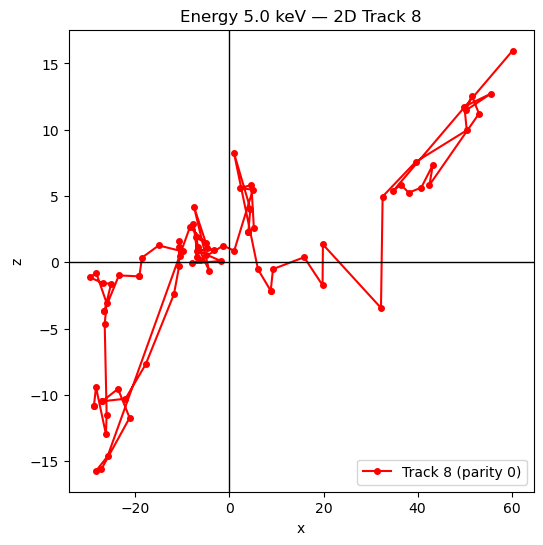

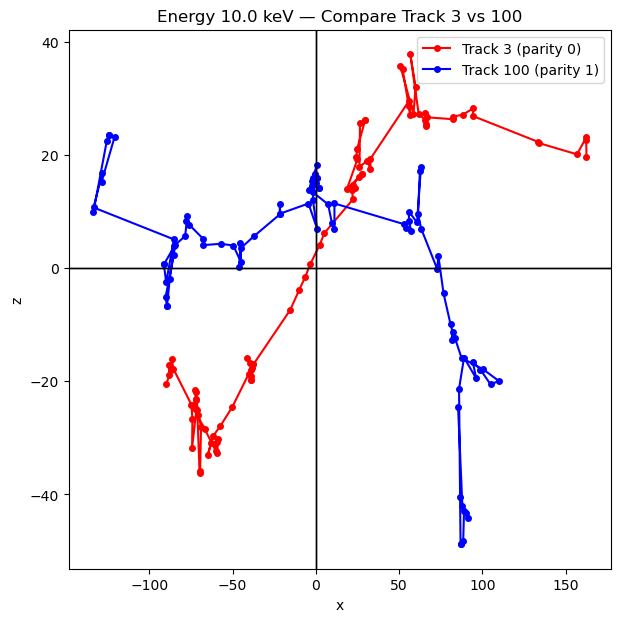

In [24]:
plot_track_2d(processed_df, energy=5.0, ion_number=8)
compare_tracks_2d(processed_df, energy=10.0, ion1=3, ion2=100)

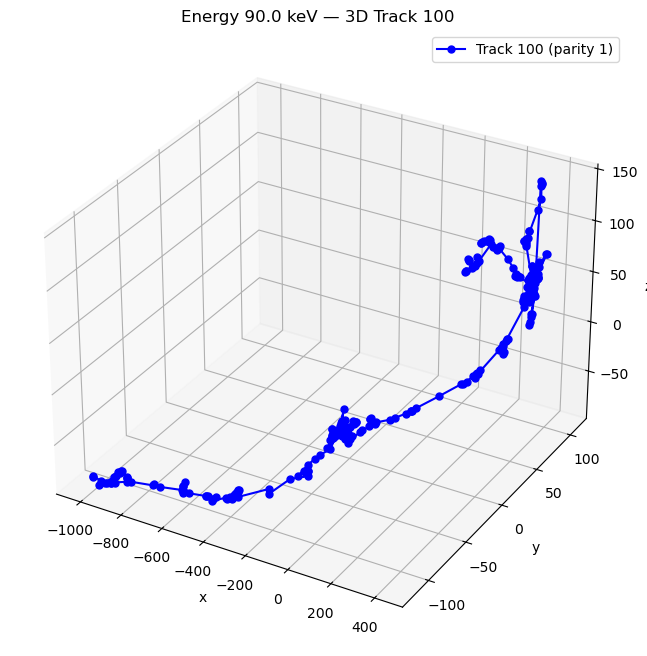

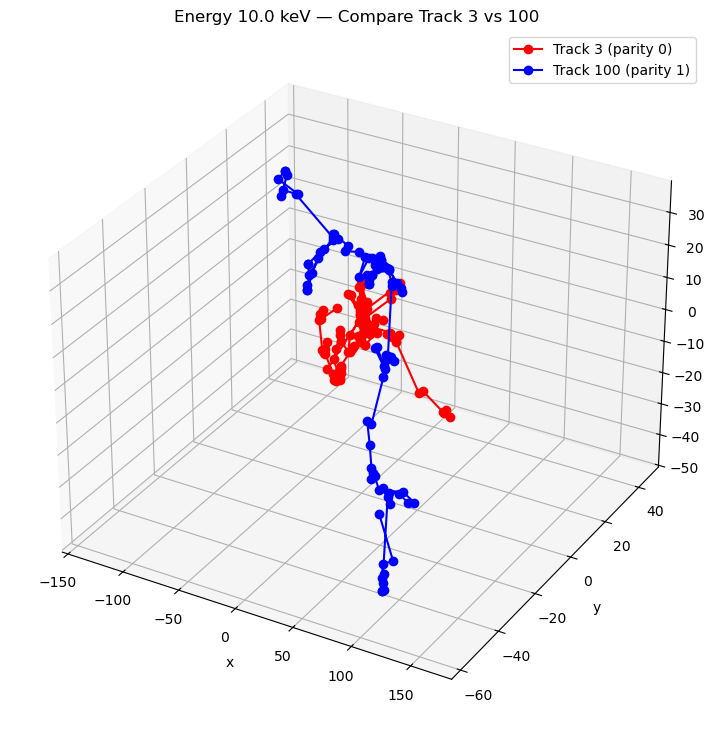

In [29]:
plot_track_3d(processed_df, energy=90.0, ion_number=100)
compare_tracks_3d(processed_df, 10.0, 3, 100)

In [72]:
import ipywidgets as widgets
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- visualization functions --- #

def plot_track_2d_interactive(df, energy, ion_number):
    track = df[(df.energy == energy) & (df.ion_number == ion_number)]
    if len(track) == 0:
        print("No track found.")
        return

    x = track.x.values
    z = track.z.values
    parity = int(track.parity.iloc[0])
    color = "red" if parity == 0 else "blue"

    plt.figure(figsize=(6,6))
    plt.scatter(x, z, "o-", color=color, markersize=4, label=f"Track {ion_number} (parity {parity})")
    plt.axvline(0, color='k', lw=1)
    plt.axhline(0, color='k', lw=1)
    plt.title(f"Energy {energy} keV — Track {ion_number} (2D x–z)")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.legend()
    plt.gca().set_aspect("equal", "box")
    plt.show()


def plot_track_3d_interactive(df, energy, ion_number):
    track = df[(df.energy == energy) & (df.ion_number == ion_number)]
    if len(track) == 0:
        print("No track found.")
        return

    x = track.x.values
    y = track.y.values
    z = track.z.values
    parity = int(track.parity.iloc[0])
    color = "red" if parity == 0 else "blue"

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, "o-", color=color, markersize=5, label=f"Track {ion_number} (parity {parity})")
    ax.set_title(f"Energy {energy} keV — Track {ion_number} (3D)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    plt.show()


# --- build UI --- #

def track_viewer(df):
    energies = sorted(df.energy.unique())

    energy_dropdown = widgets.Dropdown(
        options=energies,
        description="Energy:",
        style={'description_width': '80px'},
        layout=widgets.Layout(width='200px')
    )

    # dynamic ion_number dropdown that updates with energy
    ion_dropdown = widgets.Dropdown(
        options=[],
        description="Track:",
        style={'description_width': '80px'},
        layout=widgets.Layout(width='200px')
    )

    plot_mode = widgets.ToggleButtons(
        options=["2D", "3D"],
        description="Mode:",
        style={'description_width': '80px'}
    )

    # update ion_number options when energy changes
    def update_ion_options(*args):
        e = energy_dropdown.value
        ions = df[df.energy == e].ion_number.unique()
        ions = sorted(ions)
        ion_dropdown.options = ions

    energy_dropdown.observe(update_ion_options, "value")

    # initialize once
    update_ion_options()

    @interact(
        energy=energy_dropdown,
        ion_number=ion_dropdown,
        mode=plot_mode,
        df=fixed(df)
    )
    def update_plot(df, energy, ion_number, mode):
        if mode == "2D":
            plot_track_2d_interactive(df, energy, ion_number)
        else:
            plot_track_3d_interactive(df, energy, ion_number)

interactive(children=(Dropdown(description='Energy:', layout=Layout(width='200px'), options=(1.0, 2.5, 5.0, 7.…

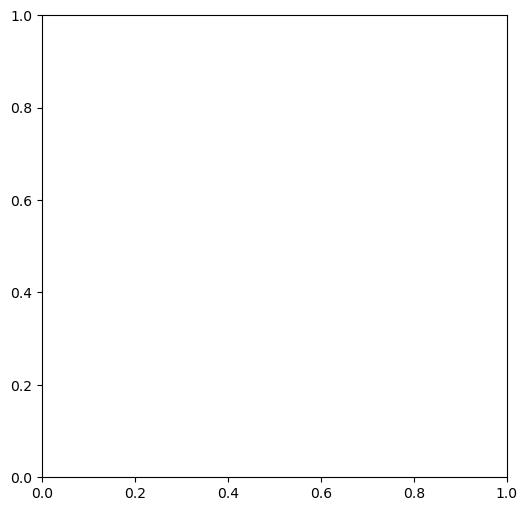

In [73]:
track_viewer(processed_df)

In [32]:
processed_df.to_csv("centered_tracks.csv", index=False)

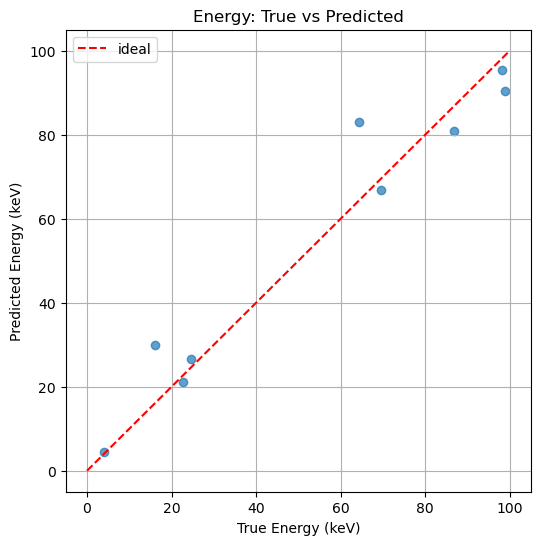

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/random_eval_results_mnpe.csv")

plt.figure(figsize=(6,6))
plt.scatter(df["true_energy"], df["pred_energy_mean"], alpha=0.7)

plt.plot([0,100],[0,100], 'r--', label="ideal")
plt.xlabel("True Energy (keV)")
plt.ylabel("Predicted Energy (keV)")
plt.title("Energy: True vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

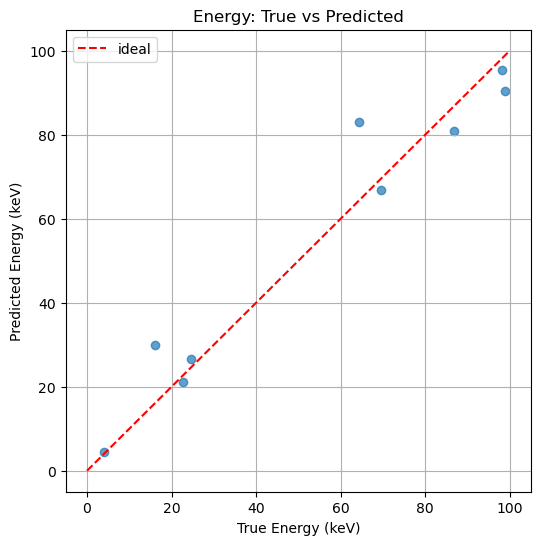

In [48]:



import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/random_eval_results_mnpe.csv")

plt.figure(figsize=(6,6))
plt.scatter(df["true_energy"], df["pred_energy_mean"], alpha=0.7)

plt.plot([0,100],[0,100], 'r--', label="ideal")
plt.xlabel("True Energy (keV)")
plt.ylabel("Predicted Energy (keV)")
plt.title("Energy: True vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
plt.figure(figsize=(7,4))
plt.hist(df["percent_error_abs"], bins=20, edgecolor='k', alpha=0.7)

plt.xlabel("Absolute % Error")
plt.ylabel("Count")
plt.title("Distribution of Energy Errors")
plt.grid(True)
plt.show()

KeyError: 'percent_error_abs'

<Figure size 700x400 with 0 Axes>

In [58]:
plt.figure(figsize=(7,4))
plt.hist(df["percent_error_abs"], bins=20, edgecolor='k', alpha=0.7)

plt.xlabel("Absolute % Error")
plt.ylabel("Count")
plt.title("Distribution of Energy Errors")
plt.grid(True)
plt.show()

KeyError: 'percent_error_abs'

<Figure size 700x400 with 0 Axes>

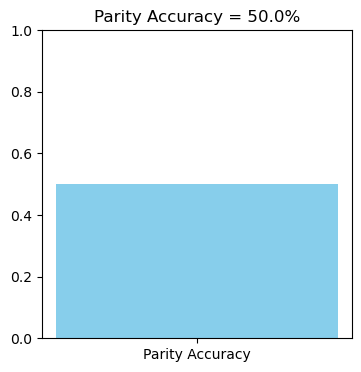

In [43]:
parity_acc = df["parity_correct"].mean()

plt.figure(figsize=(4,4))
plt.bar(["Parity Accuracy"], [parity_acc], color="skyblue")
plt.ylim(0,1)
plt.title(f"Parity Accuracy = {parity_acc*100:.1f}%")
plt.show()

In [59]:
parity_acc = df["parity_correct"].mean()

plt.figure(figsize=(4,4))
plt.bar(["Parity Accuracy"], [parity_acc], color="skyblue")
plt.ylim(0,1)
plt.title(f"Parity Accuracy = {parity_acc*100:.1f}%")
plt.show()

KeyError: 'parity_correct'

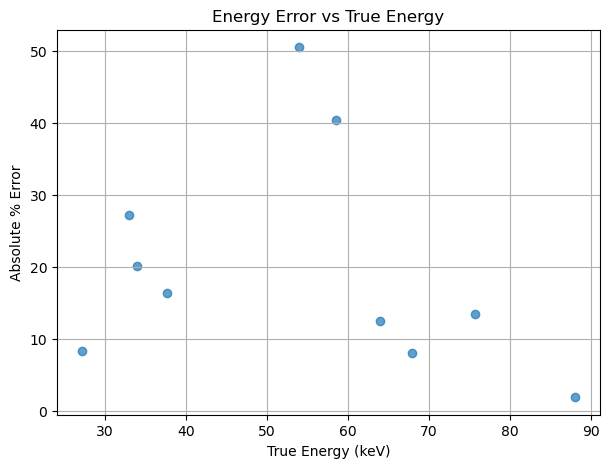

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(df["true_energy"], df["percent_error_abs"], alpha=0.7)

plt.xlabel("True Energy (keV)")
plt.ylabel("Absolute % Error")
plt.title("Energy Error vs True Energy")
plt.grid(True)
plt.show()